In [38]:
# in this model no regularization is done no overfitting is checked it is just a simple model to understand the working on mnist dataset

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [39]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

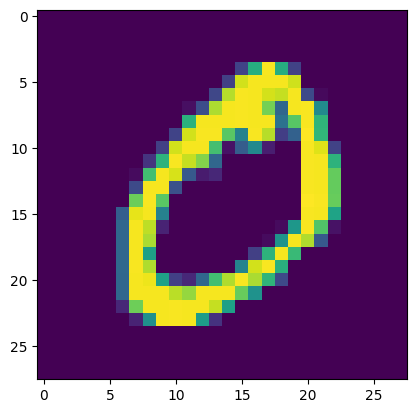

In [41]:
#if you wana see image instead of array we can do that to by
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [42]:
# normalising cause array has values but not in binary cause values of weight in same formate will help us finding result correctly and fast.
X_train=X_train/255
X_test=X_test/255
#now we got all values in between 0-1

In [43]:
model = Sequential()
#we have to convert high dimension array to 1D array (flatten)
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) #whenever we have more than 1 output we use this softmax for classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #we use sparse instead of ccentropy because we wont have to onehotencode in sparse and i think its waste of resources here but not everytime


In [46]:
history=model.fit(X_train,y_train,epochs=27,validation_split=0.2)

Epoch 1/27
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8434 - loss: 0.5095 - val_accuracy: 0.9567 - val_loss: 0.1463
Epoch 2/27
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9621 - loss: 0.1226 - val_accuracy: 0.9600 - val_loss: 0.1321
Epoch 3/27
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9739 - loss: 0.0837 - val_accuracy: 0.9673 - val_loss: 0.1083
Epoch 4/27
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9797 - loss: 0.0640 - val_accuracy: 0.9716 - val_loss: 0.0996
Epoch 5/27
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9852 - loss: 0.0462 - val_accuracy: 0.9734 - val_loss: 0.0978
Epoch 6/27
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9866 - loss: 0.0403 - val_accuracy: 0.9753 - val_loss: 0.0961
Epoch 7/27
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0301 - val_accuracy: 0.9746 - val_loss: 0.0966
Epoch 8/27
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9919 - loss: 0.026

In [47]:
y_prob= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
y_pred = y_prob.argmax(axis=1)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9785

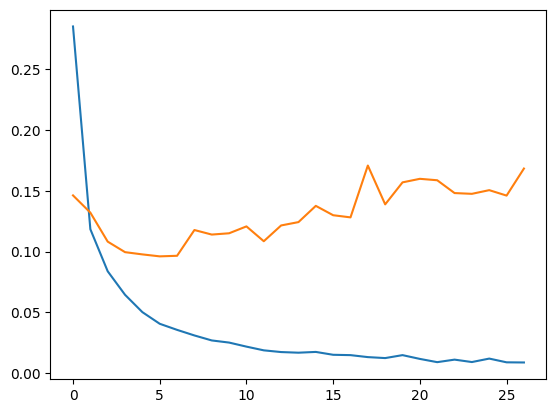

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


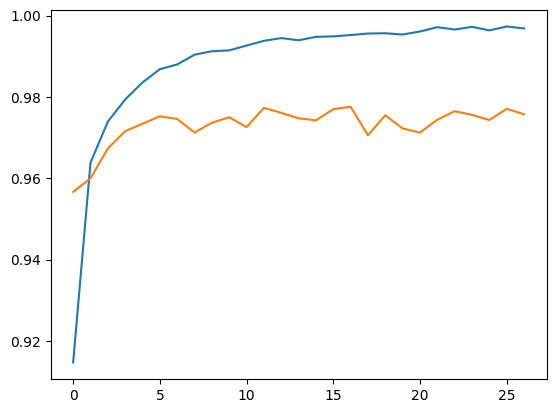

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

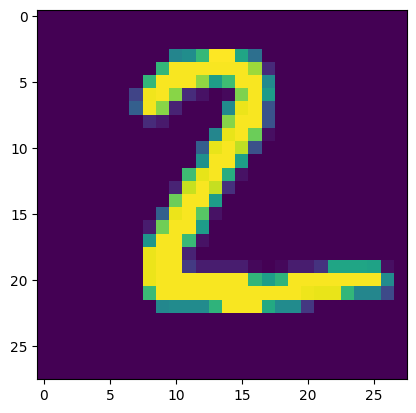

In [59]:
plt.imshow(X_test[1]) #imshow shows the image from test set as per selection

In [60]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1) #reshape array then argmax will convert it into the answer predicted which we can see as output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([2])